# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Get the maximum and minimum index value from data, like a first approach to find which rows from data are more
# different (python help: http://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers)
columns_names = data.columns.values.tolist()

for names_col in columns_names:
    print names_col,"index max: {}".format(data[names_col].idxmax()),"index min: {}".format(data[names_col].idxmin())

Fresh index max: 181 index min: 95
Milk index max: 86 index min: 154
Grocery index max: 85 index min: 75
Frozen index max: 325 index min: 420
Detergents_Paper index max: 85 index min: 75
Delicatessen index max: 183 index min: 109


In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [181,11,421]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,13146,1124,4523,1420,549,497
2,17063,4847,9053,1031,3415,1784


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
181  100.0  98.4     89.3    98.4              81.1          99.1
11    67.5  17.0     47.7    48.0              42.0          28.9
421   75.9  59.5     70.2    37.0              71.4          74.5


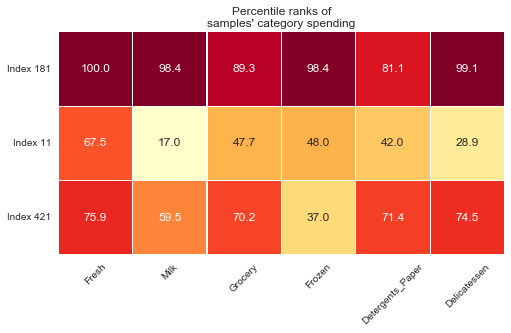

In [5]:
# Reviewer's suggestion
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The columns titles are suggesting these products are consumable goods by humans, so you can think the target markets are restaurants, cafes, fast food chain restaurant.  Although the amounts differ between the three samples, the volumes in monetary units aren't very large compared to the average of each feature.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor

for names_col in columns_names:
    new_data = data.drop([names_col], axis = 1)
    y_data = data[names_col]

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, y_data, test_size=0.25, random_state=123)

    # TODO: Create a decision tree regressor and fit it to the training set

    regressor = DecisionTreeRegressor(random_state=123).fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set

    score = regressor.score(X_test, y_test)
    print "The R^2 regressor score for {}".format(names_col), "is: {}".format(score)

The R^2 regressor score for Fresh is: -0.319388317259
The R^2 regressor score for Milk is: -0.249371680127
The R^2 regressor score for Grocery is: 0.751190388852
The R^2 regressor score for Frozen is: -0.803974953909
The R^2 regressor score for Detergents_Paper is: 0.778392930844
The R^2 regressor score for Delicatessen is: -1.35566154106


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

The R^2 is a coefficient used in statistics to measure goodness fit for regression models, the coefficient score usually is between [0,1] range (https://en.wikipedia.org/wiki/Coefficient_of_determination), the R-squared for fresh feature the score is -0.319388317259, this means the model doesn't fit well, and this imply the decision tree model for this feature doesn't fit the data, and therefore it doesn't have good predictive capabilities.  Based on this coefficient you can say that this feature is not relevant for analysis because it has a negative value, and by definition the model does not fit these data, and this could be removed from the data for this analysis.

In other hand, I predict all R^2 score.  The best adjustment is for Detergents, and Grocery, while for others the models fails to fit the data.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

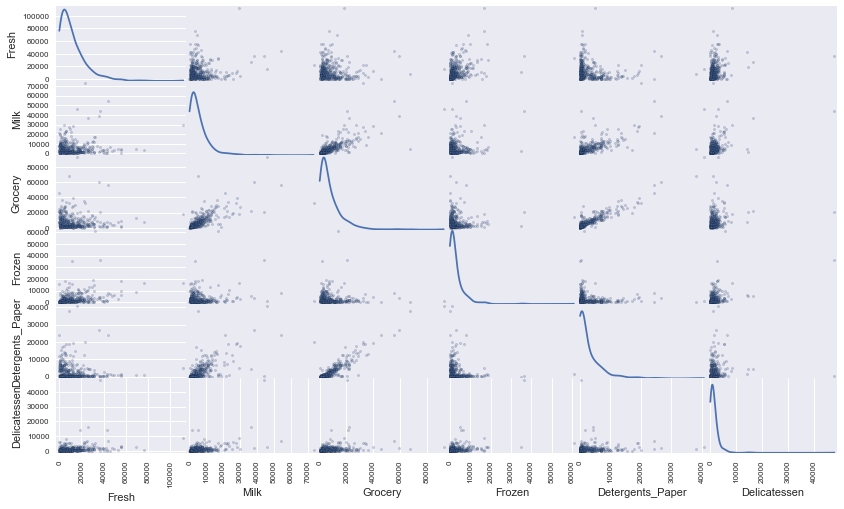

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

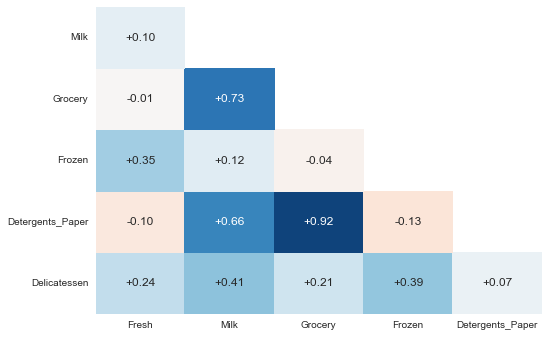

In [8]:
# Reviewer's suggestion
# get the feature correlations
corr = data.corr()

# remove first row and last column for a cleaner look
corr.drop(['Fresh'], axis=0, inplace=True)
corr.drop(['Delicatessen'], axis=1, inplace=True)

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
From the graph, looks like milk and groceries has some correlation, and groceries with detergent papers show some correlation between them too.  The distiribution's graphs are with fat tails (all has outliers) but the data is concentrate at the begining of the graphs, and no one behave like a normal distribution, all of them look like they have high kurtosis. 

Is important note, the fresh feature doesn't behave well with the other features, Is important note, the fresh feature doesn't behave well with the other variables, and this confirm what was said earlier about the R-squared, this feature can’t be predicted by the other features in the sample as R-squared suggested.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

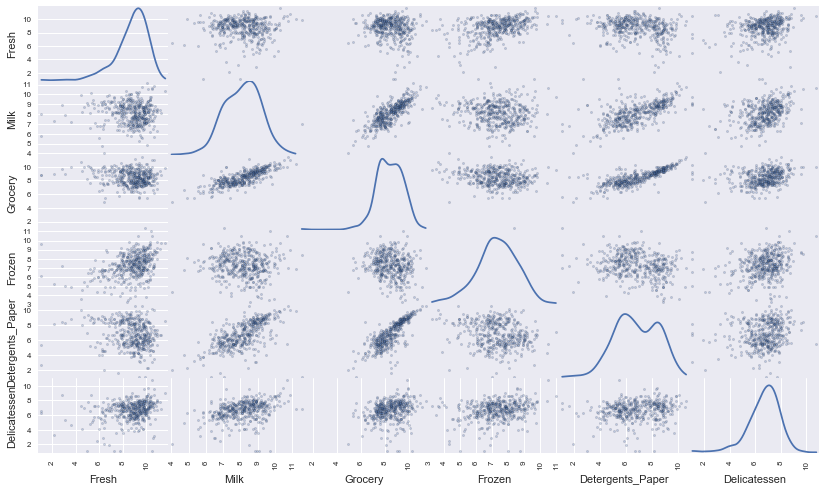

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
1,9.483873,7.024649,8.416931,7.258412,6.308098,6.208590
2,9.744668,8.486115,9.110851,6.938284,8.135933,7.486613


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# For each feature find the data points with extreme high or low values
outliers_1  = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.asscalar(np.percentile(log_data[feature], 25, axis=0, keepdims=True))
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.asscalar(np.percentile(log_data[feature], 75, axis=0, keepdims=True))
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5

    # Display the outliers
    add = 0
    print "Data points considered outliers for the feature '{}':".format(feature) 
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])    
    add = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers_1.append(add)
           
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = []
outliers_2 = reduce(lambda x,y: x+y,outliers_1)

print "Data points considered outliers for all feature '{}':".format(sorted(outliers_2))

outliers = sorted(list(set(reduce(lambda x,y: x+y,outliers_1))))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Data points considered outliers for all feature '[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]':


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
Yes, there is 65, 66, 75, 128, and 154.  I think the data must be removed like the others, because the outliers has the same effect over the sample, regardless of whether they are repeated in one or more features.  If any data points were added to the outliers list must be removed only if they meet the criterion of the interquartile range.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

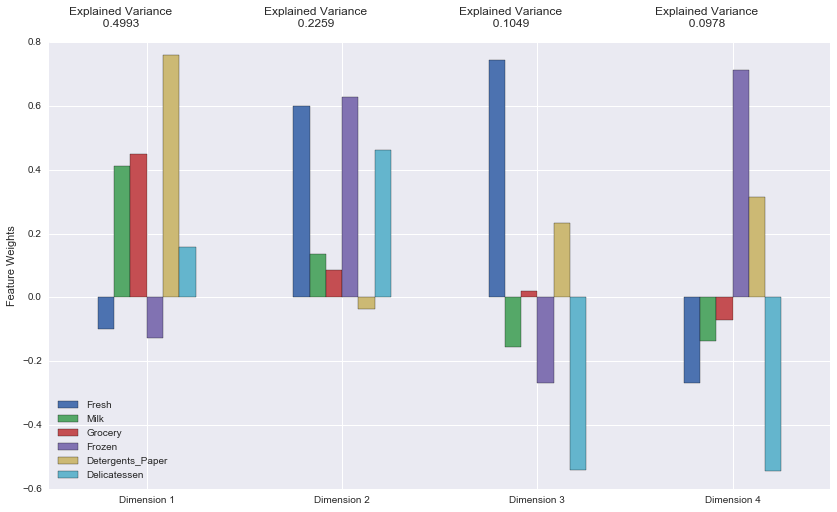

In [12]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [13]:
# Acumulated PCA values
print (pca_results.cumsum())

             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4993 -0.0976  0.4109   0.4511 -0.1280   
Dimension 2              0.7252  0.5032  0.5479   0.5363  0.5020   
Dimension 3              0.8301  1.2484  0.3935   0.5567  0.2350   
Dimension 4              0.9279  0.9817  0.2560   0.4857  0.9483   

             Detergents_Paper  Delicatessen  
Dimension 1            0.7595        0.1579  
Dimension 2            0.7219        0.6213  
Dimension 3            0.9568        0.0791  
Dimension 4            1.2725       -0.4654  


|Dimension | Explained Variance |Fresh |	Milk |	Grocery |	Frozen |	Detergents_Paper |	Delicatessen|
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| 1 |  0.4993 |-0.0976 | 0.4109 |  0.4511 | -0.1280 |  0.7595 |  0.1579 |
| 2 |  0.7252 | 0.5032 | 0.5479 |  0.5363 |  0.5020 |  0.7219 |  0.6213 |
| 3 |  0.8301 | 1.2484 | 0.3935 |  0.5567 |  0.2350 |  0.9568 |  0.0791 |
| 4 |  0.9279 | 0.9817 | 0.2560 |  0.4857 |  0.9483 |  1.2725 |  -0.4654 |

In [14]:
#PCA values
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,0.7452,-0.1544,0.0204,-0.2670,0.2349,-0.5422
Dimension 4,0.0978,-0.2667,-0.1375,-0.0710,0.7133,0.3157,-0.5445


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

- The first and second components explain 72.52% of the variance.  

- The four PCA explain 92.79% of the total variance.  

- The first dimension explains 49.93% of the variance, and this is highly correlated to the Detergents Paper feature, but Milk and Grocery has a positive correlation with this dimension, and to a lesser extent, Delicatessen also have a positive correlation.  The Fresh feature hasn't any correlation with the first component, while Frozen feature has a minor negative correlation. This kind of customer behavior can be associated with retail markets.

- The second dimension explain 22.59% of the variance, in this case almost all features show positive correlations but Detergents Paper.  Fresh and Frozen features show meaningful high correlation with this dimension, and Delicatessen has an important correlation, and in more limited way Milk and Grocery show positive correlation with this dimension too. 

- The other two dimensions explain 10.49% and 9.79% with a peculiar behavior, with two variables with significantly high correlation like Fresh and Frozen features respectively, and an important correlation of Detergents Paper, the others has negative correlations (but Grocery in third dimension has a little correlation to it) with an important contribution (negative) by the delicatessen feature.  

- As explained above the Fresh feature has a R^2 negative and this coefficient puts you to think that you should eliminate it from the study, but in other hand this feature has an important correlation in dimension 2 and 3, which account for about 30% of the entire variance.  These results appear to be contradictory, but in other hand, what it may be revealing are non-linear relations that the coefficient R^2 is not able to capture.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4
0,2.6240,4.4608,0.2695,-0.1618
1,-0.9408,-0.1839,0.8338,0.0536
2,1.5782,0.5540,0.6384,-0.6134


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.6240,4.4608
1,-0.9408,-0.1839
2,1.5782,0.5540


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
The K-means clustering is simple method, is faster than other methods with large amounts of data, produce tighter clusters, and no need to keep too much data in memory.

The Gaussian Mixture Model clustering algorithm apply statistical parametric models, is flexible in the selection of component distribution, and get a density distribution.

I think the k-mean algorithm is better because the empirical density distributions, even with the log transformations, are no normal, and the GMM assumes the data behave like a normal distribution, something that is not fulfilled as shown by the graphics.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans  #(http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
from sklearn import metrics
number_c = [2,3,4,5,6,7,8,9,10,11,12,13,14,15, 20,25,30,50]

for i in number_c:
    n = i
    clusterer = KMeans(n_clusters=n, random_state=123).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)


    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score =  metrics.silhouette_score(reduced_data, preds, metric='sqeuclidean') #(http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)
    print "the mean silhouette coefficient for the {} of clusters".format(n), "is: {}".format(score)

the mean silhouette coefficient for the 2 of clusters is: 0.630604748293
the mean silhouette coefficient for the 3 of clusters is: 0.527910999788
the mean silhouette coefficient for the 4 of clusters is: 0.490855804647
the mean silhouette coefficient for the 5 of clusters is: 0.500334612408
the mean silhouette coefficient for the 6 of clusters is: 0.518621431257
the mean silhouette coefficient for the 7 of clusters is: 0.516553485099
the mean silhouette coefficient for the 8 of clusters is: 0.549083026187
the mean silhouette coefficient for the 9 of clusters is: 0.495687490961
the mean silhouette coefficient for the 10 of clusters is: 0.494629261819
the mean silhouette coefficient for the 11 of clusters is: 0.506831730473
the mean silhouette coefficient for the 12 of clusters is: 0.515588681967
the mean silhouette coefficient for the 13 of clusters is: 0.52399787874
the mean silhouette coefficient for the 14 of clusters is: 0.513386153037
the mean silhouette coefficient for the 15 of c

In [19]:
# The best silhouette coefficient was getting for 2 clusters
n = 2

clusterer = KMeans(n_clusters=n, random_state=123).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)


# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score =  metrics.silhouette_score(reduced_data, preds, metric='sqeuclidean')
print "the mean silhouette coefficient for the {} of clusters".format(n), "is: {}".format(score)

the mean silhouette coefficient for the 2 of clusters is: 0.630604748293


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

** silhouette coefficient **  

| cluster | silhouette coefficient | cluster | silhouette coefficient |
| :---------------: | :---------------------: | :---------------: | :---------------------: | 
| 2               |    0.630604748293         | 11              |    0.506831730473       |
| 3               |    0.527910999788         | 12              |    0.515588681967       |
| 4               |    0.490855804647         | 13              |    0.523997878740       |
| 5               |    0.500334612408         | 14              |    0.513386153037       |
| 6               |    0.518621431257         | 15              |    0.495140012214       |
| 7               |    0.516553485099         | 20              |    0.509730622460       |
| 8               |    0.549083026187         | 25              |    0.535408435321       |
| 9               |    0.495687490961         | 30              |    0.548958374495       |
| 10              |    0.494629261819         | 50              |    0.537689599635       |


I try few numbers in clusters, and by far the best silhouette coefficient is for 2 cluster.  All others fluctuate  around 0.5, and increase the number of cluster doesnn't improve 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

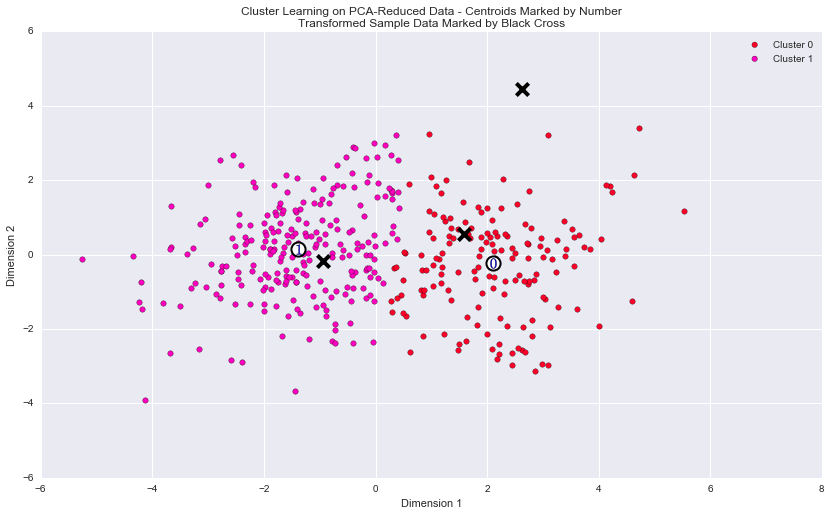

In [20]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.


** Auxiliary Information to answer question 8 **

** EDA **

|     |Fresh |	Milk |	Grocery |	Frozen |	Detergents_Paper |	Delicatessen|
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|count |	440.000000 |	440.000000 |	440.000000 |	440.000000 |	440.000000 |	440.000000 |
|mean |	12,000.297727 |	5,796.265909 |	7,951.277273 |	3,071.931818 |	2,881.493182 |	1,524.870455 |
|std |	12,647.328865 |	7,380.377175 |	9,503.162829 |	4,854.673333 |	4,767.854448 |	2,820.105937 |
|min |	3.000000 |	55.000000 |	3.000000 |	25.000000 |	3.000000 |	3.000000 |
|25% |	3,127.750000 |	1,533.000000 |	2,153.000000 |	742.250000 |	256.750000 |	408.250000 |
|50% |	8,504.000000 |	3,627.000000 |	4,755.500000 |	1,526.000000 |	816.500000 |	965.500000 |
|75% |	16,933.750000 |	7,190.250000 |	10,655.750000 |	3,554.250000 |	3,922.000000 |	1,820.250000 |
|max |	112,151.000000 |	73,498.000000 |	92,780.000000 |	60,869.000000 |	40,827.000000 |	47,943.000000 |

** Clusters **

| Segment    |Fresh |	Milk |	Grocery |	Frozen |	Detergents_Paper |	Delicatessen|
|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|Segment 0 |	5,424.0 |	7,780.0 |	11,532.0 |	1,123.0 |	4,444.0 |	1,136.0 |
|Segment 1 |	9,451.0 |	1,938.0 |	2,449.0 |	2,200.0 |	3,07.0 |	771.0 |

**Answer:**

- The Fresh products whose value are lowers than 50% quantile are best represented by segment 0, higher values than quantile 50% are best represented by segment 1.

- The Milk products whose value are lowers than 50% quantile are best represented by segment 1, higher values than quantile 50% are best represented by segment 0.

- The Grocery products whose value are lowers than 50% quantile are best represented by segment 1, higher values than quantile 50% are best represented by segment 0. 

- The Frozen products whose value are lowers than 50% quantile are best represented by segment 0, higher values than quantile 50% are best represented by segment 1.

- The Detergents Paper products whose value are lowers than 75% quantile are best represented by segment 1, higher values than quantile 75% are best represented by segment 0.

- Delicatessen products whose value are lowers than 50% quantile are best represented by segment 0, higher values than quantile 50% are best represented by segment 1.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

All points looks like they fitted well, the model boundary shows that the three points of the sample are on their respective sides.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The wholesale distributor must measure the response of the two segments, for this he can use the segmentation obtained by the k-means algorithm. In order to control the obtained results and to validate that the answer obtained by the test, it must make a significance test between two samples. Once the difference between the samples is validated, it will apply the change in the delivery of products to that segment that obtains the best response to the change introduced in the delivery times.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Using a semi supervised learning algorithm, linking another feature like region and channels with customer segment, the target value could be features sales, or total seals.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

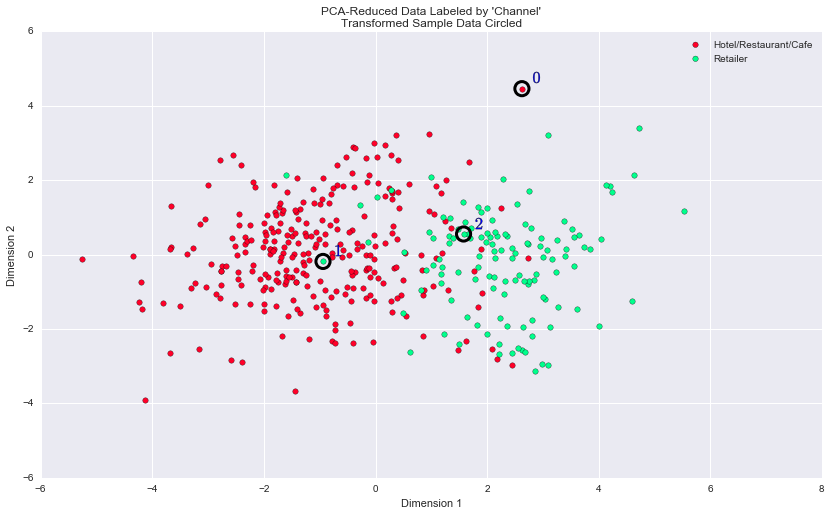

In [23]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

When the categories are graphed it shows two groups which is consistent with the cluster number selected.  

In other hand, the cluster's algorithm looks like 50/50 partition, and doesn't represent well the boundaries between the categories as you can see if you contrast the data graph by category with cluster graph.  This is coherent with a 0.630604748293 silhouette coefficient best score showed by the training sample with two clusters, which is showing some overlap between the clusters.

In the forecast the algorithm fail in predicts two sample points (0 and 1).  Perhaps more data and more features is needed, that is, a larger sample to achieve a better categorization of the clusters.

About the first question, I think the sample are more related with restaurants, obviously, this is not what happens, it shows that you should better understand the sample to make inferences of this kind.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.